In [ ]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'reviews.csv'
reviews_data = pd.read_csv(file_path)

reviews_text = reviews_data['comments']
review_scores = reviews_data['review_scores_rating']

In [ ]:
# Step 3: Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and +1 (positive)

In [ ]:
# Step 4: Apply sentiment analysis to the 'comments' column
reviews_data['sentiment_score'] = reviews_text.apply(analyze_sentiment)

In [ ]:
# Step 5: Classify sentiment as Positive, Neutral, or Negative
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

reviews_data['sentiment'] = reviews_data['sentiment_score'].apply(sentiment_category)

<ipython-input-20-39d09ff6eb59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=reviews_data, palette='coolwarm')


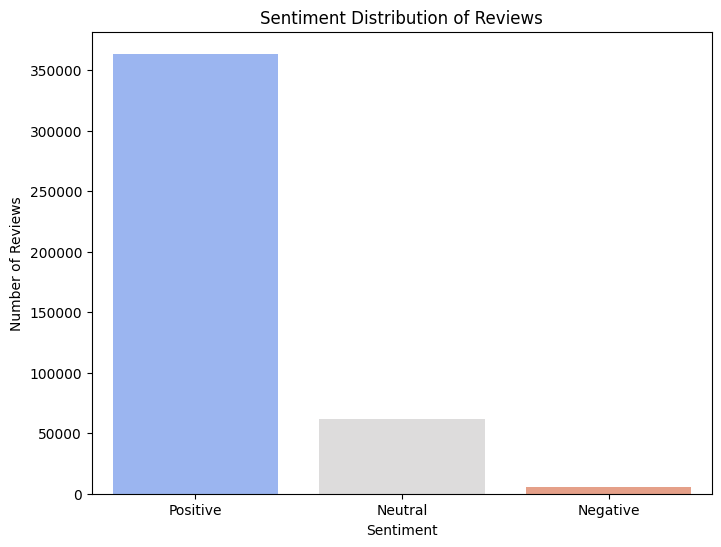

In [ ]:
# Step 6: Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=reviews_data, palette='coolwarm')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-21-dea2fcd95f8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_scores_rating', data=reviews_data, palette='coolwarm')


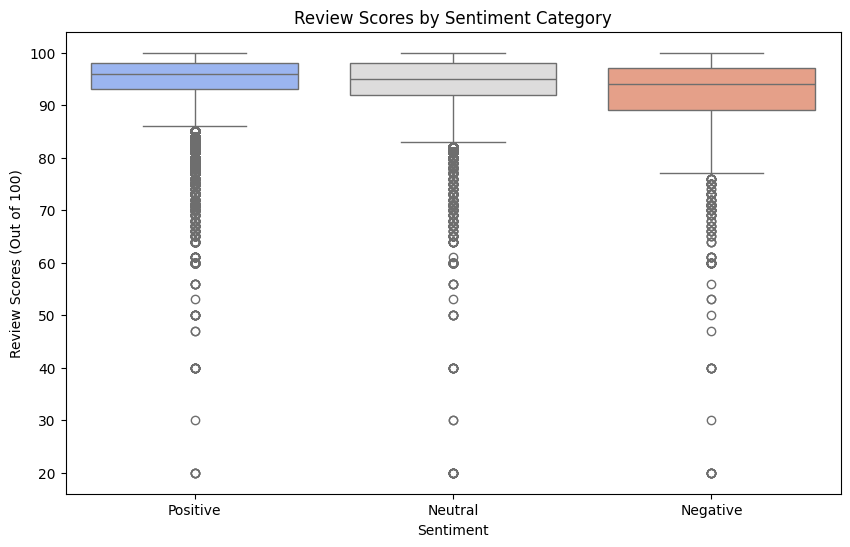

In [ ]:
# Step 7: Compare sentiment with review scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_scores_rating', data=reviews_data, palette='coolwarm')
plt.title('Review Scores by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Review Scores (Out of 100)')
plt.show()

In [ ]:
# Step 8: Save the output to a new CSV file (optional)
reviews_data.to_csv('reviews_with_sentiment_and_scores_textblob.csv', index=False)

In [ ]:
# Step 9: Print a summary of sentiment counts and average ratings per sentiment category
sentiment_summary = reviews_data.groupby('sentiment')['review_scores_rating'].mean()
print("Average Review Scores by Sentiment Category:\n", sentiment_summary)

Average Review Scores by Sentiment Category:
 sentiment
Negative    92.063205
Neutral     94.323678
Positive    95.067854
Name: review_scores_rating, dtype: float64
